# Exploring Climate Trends: Comparative Analysis of Long-term Temperature Trends in the Southern and Northern Hemispheres.

### Objective: 
The objective of this project was to analyze and understand the patterns and trends of temperature anomalies across the Northern and Southern Hemispheres through a series of descriptive statistical analyses and detailed visualizations.

We'll start by cleaning and analyzing the Southern Hemisphere dataset before proceeding to do the same for the Northern Hemisphere before we will then compare both data sets. 

**Step 1:** Load and Clean both data sets. This will be done in 2 parts. We will start by cleaning and exploring the Southern Hemisphere data set before moving on to the Northern data set.
1. Load and Clean the Southern Hemisphere Dataset.
2. Load and Clean the Northern Hemisphere Dataset.

**Step 2:** Exploratory Data Analysis (EDA) and Visualization to understand the data's underlying patterns and trends between the two hemispheres.: This will also be broken into two parts: 
1. We'll perform an exploratory data analysis on the Southern and Northern Hemisphere dataset. This will include generating descriptive statistics and summarizing insights. 
- 1a. Identify trends in Southern Hemisphere using descriptive statistics
- 1b. Identify trends in Southern Hemisphere using descriptive statistics
- 1c. Average Temperature Anomalies
2. The next part will use visualizations such as time series plots, histograms, and scatter plots will be crucial for understanding the data. Using both hemispheres, we will compare the trends and patterns to gain a comprehensive understanding of global climate dynamics.

Step 3: Conclusion and summarizing all findings.

### Data Questions
These questions would help to guide our research and analysis. 

To better understand how climate change was affecting the planet, we came up with a list of additional questions that we hoped to answer through our analysis. 
1. What are the seasonal variations and patterns in temperature anomalies?
2. How do long-term temperature trends manifest, and are there any significant periods of warming or cooling?
3. How reliable are the temperature anomaly estimates considering the associated uncertainties?
4. How do short-term, medium-term, and long-term temperature trends compare when analyzed through different moving averages?
5. How do temperature anomalies and trends between the Northern Hemisphere and Southern Hemisphere differ?


### Set-up: Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 1a: Load and Clean the Southern Hemisphere Dataset
We'll begin by loading the Southern Hemisphere dataset, to get a basic understanding of its structure, including the number of records in each column.

In [3]:
#read data file
df_south = pd.read_csv("southern-hemisphere-TAVG-Trend.txt")

#display first 5 rows
print("Table Preview:\n",df_south.head())

#display info
df_south.info()

Table Preview:
                                                                                                                                         \t\t  Monthly          Annual          Five-year        Ten-year        Twenty-year
Year                                                Month   Anomaly  Unc.    Anomaly  Unc.    Anomaly  Unc.    Anomaly  Unc.    Anomaly                                               Unc.                                 
  1880     8     0.323  0.693       NaN    NaN ... NaN    NaN       NaN   NaN        NaN   NaN        NaN   NaN        NaN   NaN                                                       NaN                                 
  1880     9    -0.712  0.653       NaN    NaN ... NaN    NaN       NaN   NaN        NaN   NaN        NaN   NaN        NaN   NaN                                                       NaN                                 
  1880    10    -0.688  0.692    -0.325  0.327 ... NaN    NaN       NaN   NaN        NaN   NaN        Na

The initial load of the Southern Hemisphere dataset indicates that the data might not be structured as expected for a CSV file, likely due to the presence of multiple spaces between columns rather than a single delimiter. This suggests the file format is more complex, potentially a fixed-width format or a tab-separated file with irregular spacing.

##### 1.a.1 Reloading dataset
Let's proceed by attempting a more appropriate method to load the dataset, focusing on correctly parsing the columns. Given the initial look, a more tailored approach using regular expressions to split the columns, manually specify column widths and assign approariate column names.

Let's try to re-parse the data with these considerations in mind.

In [4]:
# Re-load the Southern Hemisphere data
df_south = pd.read_csv("southern-hemisphere-TAVG-Trend.txt", delim_whitespace=True, header=None, skiprows=2)
# Assign column names
columns = ["Year", "Month", 
           "Monthly Anomaly", "Monthly Unc.",
           "Annual Anomaly", "Annual Unc.",
           "Five-year Anomaly", "Five-year Unc.",
           "Ten-year Anomaly", "Ten-year Unc.",
           "Twenty-year Anomaly", "Twenty-year Unc."]
df_south.columns = columns

#display column names
print("Columns in dataset:\n",df_south.columns)

#display info
print(df_south.info())

Columns in dataset:
 Index(['Year', 'Month', 'Monthly Anomaly', 'Monthly Unc.', 'Annual Anomaly', 'Annual Unc.', 'Five-year Anomaly', 'Five-year Unc.', 'Ten-year Anomaly', 'Ten-year Unc.', 'Twenty-year Anomaly', 'Twenty-year Unc.'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1685 entries, 0 to 1684
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 1685 non-null   int64  
 1   Month                1685 non-null   int64  
 2   Monthly Anomaly      1683 non-null   float64
 3   Monthly Unc.         1683 non-null   float64
 4   Annual Anomaly       1677 non-null   float64
 5   Annual Unc.          1677 non-null   float64
 6   Five-year Anomaly    1639 non-null   float64
 7   Five-year Unc.       1639 non-null   float64
 8   Ten-year Anomaly     1594 non-null   float64
 9   Ten-year Unc.        1594 non-null   float64
 10  Twenty-year Anomaly  1504 non-null   fl

- There are 1,685 rows across 12 columns.
- Columns consist of Year, Month, and various temperature anomalies with corresponding uncertainties.
- Data types are primarily float64 for anomaly and uncertainty values, with int64 for Year and Month.

#### 1.a.2 Initial Observations:
Preview the first 5 rows

In [5]:
# Display the first few rows to understand its structure and identify any immediate cleaning needs
df_south.head()

,Year,Month,Monthly Anomaly,Monthly Unc.,Annual Anomaly,Annual Unc.,Five-year Anomaly,Five-year Unc.,Ten-year Anomaly,Ten-year Unc.,Twenty-year Anomaly,Twenty-year Unc.
0,1880,8,0.323,0.693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1880,9,-0.712,0.653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1880,10,-0.688,0.692,-0.325,0.327,NaN,NaN,NaN,NaN,NaN,NaN
3,1880,11,-0.206,0.696,-0.294,0.330,NaN,NaN,NaN,NaN,NaN,NaN
4,1880,12,-0.357,0.726,-0.347,0.320,NaN,NaN,NaN,NaN,NaN,NaN


**Missing Values:** There are missing values in several columns, most notably in the anomaly and uncertainty measures. The exact number varies across different anomaly periods (Monthly, Annual, Five-year, Ten-year, Twenty-year).

#### 1.a.3 Further Inspection of missing values:
- First, we will identify and address missing values in each of the specified anomaly columns and the uncertainty columns..
- Based on the number, we will investigate more before deciding how to handle the missing values. The approach may include imputation or removal of missing data points, depending on their impact and prevalence.

In [6]:
df_south.isnull().sum()

Year                     0
Month                    0
Monthly Anomaly          2
Monthly Unc.             2
Annual Anomaly           8
Annual Unc.              8
Five-year Anomaly       46
Five-year Unc.          46
Ten-year Anomaly        91
Ten-year Unc.           91
Twenty-year Anomaly    181
Twenty-year Unc.       181
dtype: int64

- Monthly Anomaly and Monthly Uncertainty have 2 missing value each.
- Annual Anomaly and Annual Uncertainty each have 8 missing values.
- Five-year Anomaly and Five-year Uncertainty each have 46 missing values.
- Ten-year Anomaly and Ten-year Uncertainty each have 91 missing values.
- Twenty-year Anomaly and Twenty-year Uncertainty each have 181 missing values.

**Assumptions:** We expected some columns to have missing values because the dataset represents climate data over time, specifically anomalies in temperature, with various levels of granularity (monthly, annual, five-year, ten-year, twenty-year), it would be expected for columns with rolling averages to have missing values. This could explain why the “Monthly Anomaly” and “Monthly Unc.” columns each have the least missing values. We’re assuming the number of missing values reflects the amount of time required for the column to accumulate averages. It would explain why the “Twenty-year Anomaly” and “Twenty-year Unc.” columns each have the highest number of missing values. This delay is logical because such averages can only be calculated after enough data points are available (e.g., you can't calculate a twenty-year average until you have twenty years of data).

But before deciding on how whether to impute or drop missing values, we will further investigate to see if our speculation aligns with the data.

##### 1.a.3.1 Analyze Missingness Patterns: 
Explore patterns of missing values by examining subsets of the data. We will use boolean indexing to filter rows or columns based on missing values.

In [7]:
# Rows with missing values in a specific column
missing_column_data = df_south[df_south['Twenty-year Anomaly'].isnull()]

# Columns with missing values in any row
missing_row_data = df_south[df_south.isnull().any(axis=1)]

# Save DataFrame to a CSV file
df_south.to_csv('South_missingvalues.csv', index=False)

missing_column_data, missing_row_data

(      Year  Month  Monthly Anomaly  Monthly Unc.  Annual Anomaly  Annual Unc.  Five-year Anomaly  Five-year Unc.  Ten-year Anomaly  Ten-year Unc.  Twenty-year Anomaly  Twenty-year Unc.
 0     1880      8            0.323         0.693             NaN          NaN                NaN             NaN               NaN            NaN                  NaN               NaN
 1     1880      9           -0.712         0.653             NaN          NaN                NaN             NaN               NaN            NaN                  NaN               NaN
 2     1880     10           -0.688         0.692          -0.325        0.327                NaN             NaN               NaN            NaN                  NaN               NaN
 3     1880     11           -0.206         0.696          -0.294        0.330                NaN             NaN               NaN            NaN                  NaN               NaN
 4     1880     12           -0.357         0.726          -0.347     

**Here are some observations regarding the patterns of missing values in this table:** 
The dataset reveals missing values across various temporal scales. For annual data, NaN values in 'Annual Anomaly' and 'Annual Unc.' columns at both the beginning (1880) and end (2020). Monthly anomalies lack entries for specific months in 1881 and 2020. Rolling averages (e.g., Five-year, Ten-year, Twenty-year) commence after certain periods. Notably, twenty-year data columns are entirely NaN.

The patterns of missing values are consistent with what one might expect in a dataset that accumulates and calculates rolling averages over time. The absence of certain values can be attributed to needing enough data points to calculate rolling averages.

The patterns of missing values in the dataset are systemic. In an effort to maintain the integrity of the dataset, we elected to drop missing values as opposed to imputing values. Imputing missing values might introduce bias since the values are not missing at random. For rolling averages like five-year, ten-year, and twenty-year anomalies and uncertainties, it may be best to avoid imputation if these metrics are crucial for your analysis, as imputing them could introduce significant errors.

##### 1.a.3.2 Dropping missing values
We will proceed to dropping the missing values based on earlier analysis and verify columns.

In [8]:
# Drop all rows with any missing values
df_south.dropna(inplace=True)

df_south.isnull().sum(), len(df_south)

(Year                   0
 Month                  0
 Monthly Anomaly        0
 Monthly Unc.           0
 Annual Anomaly         0
 Annual Unc.            0
 Five-year Anomaly      0
 Five-year Unc.         0
 Ten-year Anomaly       0
 Ten-year Unc.          0
 Twenty-year Anomaly    0
 Twenty-year Unc.       0
 dtype: int64,
 1504)

Missing values have been dropped. We went from 1685 entries to 1504 entries. The data set is now ready for analysis. We will explore and clean the Northern Hemisphere data set before moving on to descriptive statistics analysis and then visualizations.

## 1b. Load and Clean the Northern Hemisphere Dataset

Just as we did for the Southern Hemisphere, we'll proceed by loading the Northern Hemisphere data, assigning appropriate column names, and conducting preliminary cleaning to prepare the data for analysis. We will follow the same cleaning process we followed for the Southern Hemisphere data set which includes: appropriately parsing the dataset and assigning column names, checking for missing values and further investigatiion, handling missing values then verifying dataset.

In [9]:
# Load the Northern Hemisphere data
df_north = pd.read_csv("northern-hemisphere-TAVG-Trend.txt", delim_whitespace=True, header=None, skiprows=2)

# Assign column names
columns = ["Year", "Month", 
           "Monthly Anomaly", "Monthly Unc.",
           "Annual Anomaly", "Annual Unc.",
           "Five-year Anomaly", "Five-year Unc.",
           "Ten-year Anomaly", "Ten-year Unc.",
           "Twenty-year Anomaly", "Twenty-year Unc."]
df_north.columns = columns

#display column names
print("Columns in dataset:\n",df_north.columns)

Columns in dataset:
 Index(['Year', 'Month', 'Monthly Anomaly', 'Monthly Unc.', 'Annual Anomaly', 'Annual Unc.', 'Five-year Anomaly', 'Five-year Unc.', 'Ten-year Anomaly', 'Ten-year Unc.', 'Twenty-year Anomaly', 'Twenty-year Unc.'], dtype='object')


##### 1.b.1 Data Frame Structure
Understanding the structure of the data set.

In [10]:
df_north.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 2172 non-null   int64  
 1   Month                2172 non-null   int64  
 2   Monthly Anomaly      2171 non-null   float64
 3   Monthly Unc.         2171 non-null   float64
 4   Annual Anomaly       2164 non-null   float64
 5   Annual Unc.          2164 non-null   float64
 6   Five-year Anomaly    2128 non-null   float64
 7   Five-year Unc.       2128 non-null   float64
 8   Ten-year Anomaly     2082 non-null   float64
 9   Ten-year Unc.        2082 non-null   float64
 10  Twenty-year Anomaly  1992 non-null   float64
 11  Twenty-year Unc.     1992 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 203.8 KB


- There are 2,172 rows across 12 columns.
- Columns inlcude Year, Month, and various temperature anomalies with corresponding uncertainties.
- Data types are Primarily float64 for anomaly and uncertainty values, with int64 for Year, Month and Decade.

#### 1.b.2 Initial Observations:

Display first 5 rows to see data checking for missing values

In [11]:
#print the data frame
df_north.head()

,Year,Month,Monthly Anomaly,Monthly Unc.,Annual Anomaly,Annual Unc.,Five-year Anomaly,Five-year Unc.,Ten-year Anomaly,Ten-year Unc.,Twenty-year Anomaly,Twenty-year Unc.
0,1840,1,0.447,1.333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1840,2,-0.821,1.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1840,3,-1.050,1.503,-0.722,0.520,NaN,NaN,NaN,NaN,NaN,NaN
3,1840,4,-0.455,0.622,-0.792,0.483,NaN,NaN,NaN,NaN,NaN,NaN
4,1840,5,-0.002,0.829,-0.794,0.471,NaN,NaN,NaN,NaN,NaN,NaN


**Missing Values:** There are missing values in several columns, most notably in the anomaly and uncertainty measures. The exact number varies across different anomaly periods (Monthly, Annual, Five-year, Ten-year, Twenty-year).

#### 1.b.3 Further Inspection of missing values:
- First, we will look at the number of missing values in each column.
- Based on the number, we will investigate more before deciding how to handle the missing values. 

In [12]:
df_north.isnull().sum()

Year                     0
Month                    0
Monthly Anomaly          1
Monthly Unc.             1
Annual Anomaly           8
Annual Unc.              8
Five-year Anomaly       44
Five-year Unc.          44
Ten-year Anomaly        90
Ten-year Unc.           90
Twenty-year Anomaly    180
Twenty-year Unc.       180
dtype: int64

- Monthly Anomaly and Monthly Uncertainty have 1 missing value each.
- Annual Anomaly and Annual Uncertainty each have 8 missing values.
- Five-year Anomaly and Five-year Uncertainty each have 44 missing values.
- Ten-year Anomaly and Ten-year Uncertainty each have 90 missing values.
- Twenty-year Anomaly and Twenty-year Uncertainty each have 180 missing values.

The similar pattern observed in the Southern Hemisphere dataset can be observed here where columns with greater moving averages have the most missing values. Given the dataset's representation of climate data over time, particularly temperature anomalies, columns with rolling averages may have missing values due to the time required to accumulate averages. This explains why columns like "Twenty-year Anomaly" and "Twenty-year Unc." have the highest number of missing values, as such averages can only be calculated with sufficient data points. Before deciding whether to impute or drop missing values, further investigation is needed to confirm this speculation.

##### 1.b.3.1 Analyze Missingness Patterns: 
Explore patterns of missing values by examining subsets of the data. We will use boolean indexing to filter rows or columns based on missing values.

In [13]:
# Rows with missing values in a specific column
missing_column_data = df_north[df_north['Twenty-year Anomaly'].isnull()]

# Columns with missing values in any row
missing_row_data = df_north[df_north.isnull().any(axis=1)]

# Save DataFrame to a CSV file
df_north.to_csv('North_missingvalues.csv', index=False)

missing_column_data, missing_row_data

(      Year  Month  Monthly Anomaly  Monthly Unc.  Annual Anomaly  Annual Unc.  Five-year Anomaly  Five-year Unc.  Ten-year Anomaly  Ten-year Unc.  Twenty-year Anomaly  Twenty-year Unc.
 0     1840      1            0.447         1.333             NaN          NaN                NaN             NaN               NaN            NaN                  NaN               NaN
 1     1840      2           -0.821         1.100             NaN          NaN                NaN             NaN               NaN            NaN                  NaN               NaN
 2     1840      3           -1.050         1.503          -0.722        0.520                NaN             NaN               NaN            NaN                  NaN               NaN
 3     1840      4           -0.455         0.622          -0.792        0.483                NaN             NaN               NaN            NaN                  NaN               NaN
 4     1840      5           -0.002         0.829          -0.794     

**Here are some observations regarding the patterns of missing values in this table:**
- As the years progress, the five-year and ten-year anomaly data begin to appear, indicating that sufficient data has been accumulated to calculate these averages. This suggests that earlier, the data points may have been too sparse for reliable calculations.

Similarly to the Southern dataset, the patterns of missing values in the dataset are systemic. In an effort to maintain the integrity of the dataset, we elected to drop missing values as opposed to imputing values.

##### 1.b.3.2 Dropping missing values
We will proceed to dropping the missing values based on earlier analysis and verify columns.

In [14]:
# Drop all rows with any missing values
df_north.dropna(inplace=True)

df_north.isnull().sum(), len(df_north)

(Year                   0
 Month                  0
 Monthly Anomaly        0
 Monthly Unc.           0
 Annual Anomaly         0
 Annual Unc.            0
 Five-year Anomaly      0
 Five-year Unc.         0
 Ten-year Anomaly       0
 Ten-year Unc.          0
 Twenty-year Anomaly    0
 Twenty-year Unc.       0
 dtype: int64,
 1991)

All missing values have been dropped. We went from 2,172 rows to 1991 rows. The `.isnull().sum()` method is used to confirm this and the dataset is now ready for further exploratory data analysis (EDA) and visualizations.

# Step 2: Exploratory Data Analysis (EDA) and Visualization

## 1. Analyze the Southern and Northern Hemisphere Dataset
Now that both data sets have been loaded and cleaned, we'll proceed to conduct a deeper analysis to examine the specified anomaly variables for trends over time, looking for patterns of warming, cooling, or stability and characterize the relationships between variables. 

We will delve into the variables (monthly, annual, five-year, ten-year, twenty-year) from the temperature datasets for both hemispheres, aiming to uncover patterns of climate change, as well as seasonal and long-term temperature trends, and examine the consistency of these trends over time. 

We will generate descriptive statistics (mean, median, standard deviation) for each variable to understand the data's central tendency and variability. We will use this to derive insights to characterize the relationships between variables in the Southern and Northern Hemisphere seperately then provide a brief summary for both comparing them. 

### 1a. Descriptive Statistics for Southern Hemisphere

In [15]:
df_south.describe()

,Year,Month,Monthly Anomaly,Monthly Unc.,Annual Anomaly,Annual Unc.,Five-year Anomaly,Five-year Unc.,Ten-year Anomaly,Ten-year Unc.,Twenty-year Anomaly,Twenty-year Unc.
count,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000
mean,1947.832447,6.510638,-0.012584,0.284548,-0.012669,0.128488,-0.013920,0.085394,-0.014066,0.074467,-0.010289,0.063967
std,36.193038,3.455239,0.451568,0.153977,0.382644,0.074382,0.347786,0.051126,0.342375,0.044782,0.339110,0.039742
min,1885.000000,1.000000,-1.380000,0.064000,-0.748000,0.033000,-0.619000,0.026000,-0.520000,0.022000,-0.462000,0.019000
25%,1916.750000,4.000000,-0.324000,0.132000,-0.256250,0.055000,-0.239250,0.036000,-0.267000,0.031000,-0.281000,0.024000
50%,1948.000000,7.000000,-0.057000,0.292000,-0.087000,0.133500,-0.094500,0.085500,-0.113000,0.072000,-0.110000,0.060000
75%,1979.000000,10.000000,0.267750,0.398250,0.236500,0.182000,0.252750,0.127000,0.179000,0.113000,0.211000,0.102000
max,2010.000000,12.000000,1.382000,0.745000,1.045000,0.358000,0.775000,0.225000,0.748000,0.179000,0.826000,0.162000


For the Southern Hemisphere, the relationships between the temperature anomalies and their uncertainties across various timescales can be characterized as follows:

1. **Monthly Anomaly:** Close to zero (mean: -0.012584°C), indicating a stable climate with minor variations. Considerable month-to-month variability persists (std: 0.451568°C), with moderate confidence (mean uncertainty: 0.284548°C).

2. **Annual Anomaly:** Reflects historical average (mean: -0.012669°C) with low variability compared to monthly figures. Moderate confidence (mean uncertainty: 0.128488°C).

3. **Five-year Anomaly:** Stable trend (mean: -0.013920°C) with reduced variability. Uncertainty decreases (mean: 0.085394°C), indicating increased reliability.

4. **Ten-year Anomaly:** Minimal change (mean: -0.014066°C) with smooth trends. Moderate confidence (mean uncertainty: 0.074467°C).

5. **Twenty-year Anomaly:** Slight cooling trend (mean: -0.010289°C) over two decades, with minimal variability. Uncertainty remains low (mean: 0.063967°C).

Overall, the Southern Hemisphere exhibits stable and reliable long-term trends in temperature anomalies, with decreasing variability and uncertainty as the timescale extends from monthly to twenty-year averages.

### 1b. Descriptive Statistics for Northern Hemisphere

In [16]:
df_north.describe()

,Year,Month,Monthly Anomaly,Monthly Unc.,Annual Anomaly,Annual Unc.,Five-year Anomaly,Five-year Unc.,Ten-year Anomaly,Ten-year Unc.,Twenty-year Anomaly,Twenty-year Unc.
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,1927.540934,6.500753,-0.066869,0.272045,-0.067245,0.134456,-0.068069,0.098177,-0.068560,0.088046,-0.068081,0.080523
std,47.908437,3.453623,0.609663,0.252218,0.455250,0.115159,0.421297,0.080366,0.414105,0.071909,0.411597,0.067617
min,1845.000000,1.000000,-2.322000,0.042000,-1.111000,0.022000,-0.681000,0.022000,-0.634000,0.019000,-0.681000,0.019000
25%,1886.000000,3.500000,-0.409500,0.116000,-0.396500,0.057000,-0.370000,0.039000,-0.358500,0.034000,-0.386000,0.030000
50%,1928.000000,7.000000,-0.073000,0.166000,-0.133000,0.085000,-0.113000,0.067000,-0.102000,0.064000,-0.110000,0.063000
75%,1969.000000,9.500000,0.254500,0.338500,0.155000,0.157500,0.095000,0.114000,0.063500,0.108500,0.041000,0.098000
max,2010.000000,12.000000,2.503000,2.518000,1.303000,0.611000,1.112000,0.369000,1.109000,0.302000,1.176000,0.305000


For the Northern Hemisphere, the relationships between the temperature anomalies and their uncertainties can be characterized as follows:
1. **Monthly Anomaly and Uncertainty:** Monthly anomalies vary significantly (mean: -0.067°C), tending to average near zero over time. Notable uncertainty in extreme monthly temperatures (mean: 0.272°C).

2. **Annual Anomaly and Uncertainty:**  Annual anomalies deviate slightly from the baseline (mean: -0.067°C), with less variability than monthly figures. Higher confidence in annual measurements (mean uncertainty: 0.134°C).

3. **Five-year Anomaly and Uncertainty:** Five-year anomalies reveal a consistent trend (mean: -0.068°C), indicating increased reliability. Further reduction in uncertainty (mean: 0.098°C).

4. **Ten-year Anomaly and Uncertainty:** Ten-year anomalies suggest a cooling trend (mean: -0.069°C), with smoother trends and higher confidence. Reduced uncertainty (mean: 0.088°C) compared to shorter timescales.

5. **Twenty-year Anomaly and Uncertainty:** Twenty-year Anomaly and Uncertainty: Twenty-year anomalies indicate a modest cooling trend (mean: -0.068°C), with minimal variability. Highest confidence in long-term climate data (mean uncertainty: 0.081°C).

Overall, for the Northern Hemisphere, there is a trend of decreasing variability and uncertainty in temperature anomalies as the timescale extends from monthly to twenty years. Short-term fluctuations show warming, while the extended view over two decades suggests periods of cooling dispersed with warming trends.

Next, we'll proceed with the visualization phase to further analyze the trends. This phase will visualize patterns, trends in the temperature anomalies over time. This will involve generating plots for monthly, annual, and longer-term anomalies to visually assess how temperature trends have evolved in both hemispheres.

## 2. Visualization and Comparative Analysis of both hemispheres.
Let's begin with the Time Series Analysis to visualize the "Monthly Anomaly" over time, which will help us identify short-term fluctuations and any cyclical patterns. After that, we'll look at the "Annual Anomaly" to observe year-to-year variability and potential long-term trends.

Each visualization will guide us in anwering the data questions mentioned at the beginning of the noteboo. 

To tell a coherent story through our visualizations and align with the research questions, we can order the visualizations as follows:

1. Histogram of Monthly and Annual Anomalies of both Hemispheres.
2. Time Series of Annual Temperature Anomalies over Time to display the temperature anomalies over time for the Southern Hemisphere and Northern Hemisphere.
3. Box Plots to illustrate the spread of temperature anomalies.
4. Heatmaps for each Year by Month Anomalies
5. Decadal Trends for Five-year, Ten-year, Twenty-year Averages
6. Decadal Trend Summary Table to reinforce decadal trends graph
7. Northern vs. Southern Hemisphere Trends: side-by-side comparisons of the Northern and Southern Hemisphere anomalies over time
8. Scatter Plots to plot temperature anomalies against their uncertainties
9. Correlation Matrices to tie everthing together and providing a quantitative backdrop to the qualitative insights from earlier visualizations.

### 1. Histograms of monthly and annual temperature anomalies in the Southern Hemisphere and Northern Hemisphere
1. Distribution of Monthly Anomalies: A histogram to show the distribution of monthly temperature anomalies, helping to understand the range and frequency of deviations from the average.
2. Annual Anomaly Distribution: To help identify how often extreme temperature years occur and the skewness towards warming or cooling.

We start with this visualization because it sets the foundation for understanding the underlying variability and the central tendency in the temperature data, which is crucial before examining specific trends or patterns. It provides a baseline understanding of how temperature anomalies are distributed over time, which is essential for interpreting subsequent analyses within the broader context of climate change research.

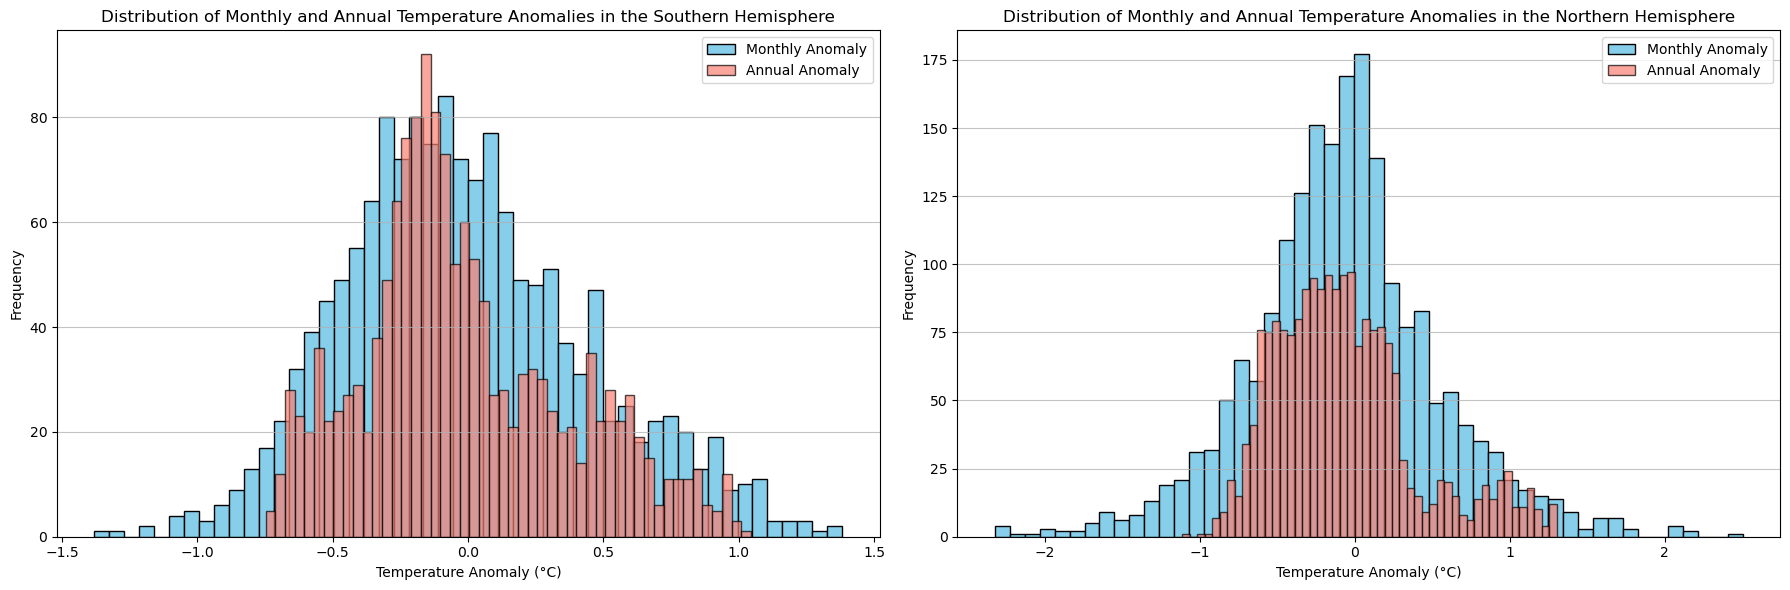

In [18]:
plt.figure(figsize=(18, 6))

# Histogram for Southern Hemisphere "Monthly Anomaly" and "Annual Anomaly"
plt.subplot(1, 2, 1)
plt.hist(df_south["Monthly Anomaly"], bins=50, color='skyblue', edgecolor='black', label='Monthly Anomaly')
plt.hist(df_south["Annual Anomaly"], bins=50, color='salmon', edgecolor='black', label='Annual Anomaly', alpha=0.7)
plt.title("Distribution of Monthly and Annual Temperature Anomalies in the Southern Hemisphere")
plt.xlabel("Temperature Anomaly (°C)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', alpha=0.75)

# Histogram for Northern Hemisphere "Monthly Anomaly" and "Annual Anomaly"
plt.subplot(1, 2, 2)
plt.hist(df_north["Monthly Anomaly"], bins=50, color='skyblue', edgecolor='black', label='Monthly Anomaly')
plt.hist(df_north["Annual Anomaly"], bins=50, color='salmon', edgecolor='black', label='Annual Anomaly', alpha=0.7)
plt.title("Distribution of Monthly and Annual Temperature Anomalies in the Northern Hemisphere")
plt.xlabel("Temperature Anomaly (°C)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

The histograms compare the frequency distribution of monthly and annual temperature anomalies in the Southern Hemisphere (left) and Northern Hemisphere (right).

**Observations and Insights:**

- Both hemispheres show a wider spread in monthly anomalies compared to annual, indicating greater variability on a monthly basis.
In the Southern Hemisphere, the distributions are more centered around zero, suggesting less extreme temperature deviations on both monthly and annual scales.
- The Northern Hemisphere exhibits a broader distribution for monthly anomalies and a more skewed distribution for annual anomalies, with a tail extending towards higher temperatures, indicating more frequent warm extremes.

**Answered Question:** This visualization addresses the question, "What are the seasonal variations and patterns in temperature anomalies?" The comparison of monthly and annual distributions helps to understand the extent of short-term variability versus longer-term stability.

### 2. Time Series of Annual Temperature Anomalies Over Time: 

Following the histograms is a time series analysis with moving averages because it adds a temporal dimension to the data. While histograms provide a sense of distribution and central tendency, time series plots reveal trends over time, fluctuations, and any shifts in the central tendency. A time series analysis graph allows us to see not just when and how often temperature anomalies occur, but also the direction and consistency of temperature changes over extended periods. This is crucial for understanding climate trends beyond the static view of a histogram.

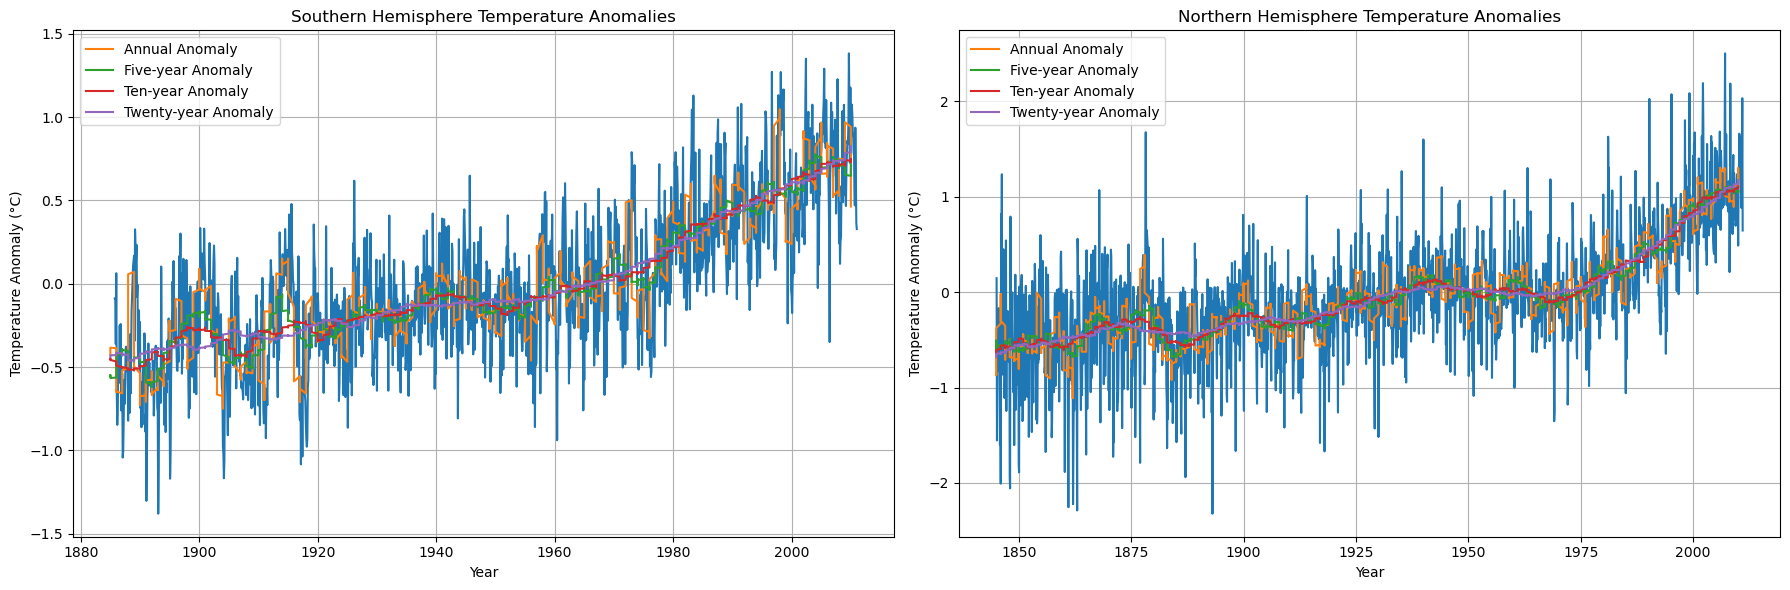

In [19]:
plt.figure(figsize=(18, 6))

# Plot for Southern Hemisphere
plt.subplot(1, 2, 1)
plt.plot(df_south["Year"] + df_south["Month"]/12, df_south["Monthly Anomaly"])
plt.plot(df_south["Year"], df_south["Annual Anomaly"], label="Annual Anomaly")
plt.plot(df_south["Year"], df_south["Five-year Anomaly"], label="Five-year Anomaly")
plt.plot(df_south["Year"], df_south["Ten-year Anomaly"], label="Ten-year Anomaly")
plt.plot(df_south["Year"], df_south["Twenty-year Anomaly"], label="Twenty-year Anomaly")
plt.title("Southern Hemisphere Temperature Anomalies")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid(True)
plt.legend()

# Plot for Northern Hemisphere
plt.subplot(1, 2, 2)
plt.plot(df_north["Year"] + df_north["Month"]/12, df_north["Monthly Anomaly"])
plt.plot(df_north["Year"], df_north["Annual Anomaly"], label="Annual Anomaly")
plt.plot(df_north["Year"], df_north["Five-year Anomaly"], label="Five-year Anomaly")
plt.plot(df_north["Year"], df_north["Ten-year Anomaly"], label="Ten-year Anomaly")
plt.plot(df_north["Year"], df_north["Twenty-year Anomaly"], label="Twenty-year Anomaly")
plt.title("Northern Hemisphere Temperature Anomalies")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


The graphs display the temperature anomalies over time for the Southern Hemisphere (left) and Northern Hemisphere (right), with data points for annual and various moving averages (five-year, ten-year, twenty-year).

**Southern Hemisphere (left graph):**The temperature anomalies have an overall upward trend, indicating a warming climate.
The longer the period of the moving average, the smoother the curve, showing a clearer trend of warming that is less affected by short-term fluctuations.

**Northern Hemisphere (right graph):** There is a similar upward trend in temperature anomalies, with greater variability in annual data points compared to the Southern Hemisphere.
The twenty-year moving average shows a consistent warming trend, despite the high variability in the shorter-term annual data.

**Answered Question:** These graphs primarily address the question of "How do long-term temperature trends manifest, and are there any significant periods of warming or cooling?" They illustrate a clear long-term warming trend in both hemispheres, with a notable increase in temperature anomalies over time, especially in recent decades. The smoothing effect of the moving averages also allows us to observe the relative stability of this warming trend when viewed over longer periods.

### 3. Box Plots of Seasonal Variability
Box plots for each month or season to illustrate the spread of temperature anomalies, highlighting the months with the greatest variability and potential outliers. By positioning this analysis after the histograms, we delve deeper into the nuances of the data, going from a broad overview to a more granular monthly inspection, which is critical for capturing the full scope of climate behavior and its impact on seasonal patterns.

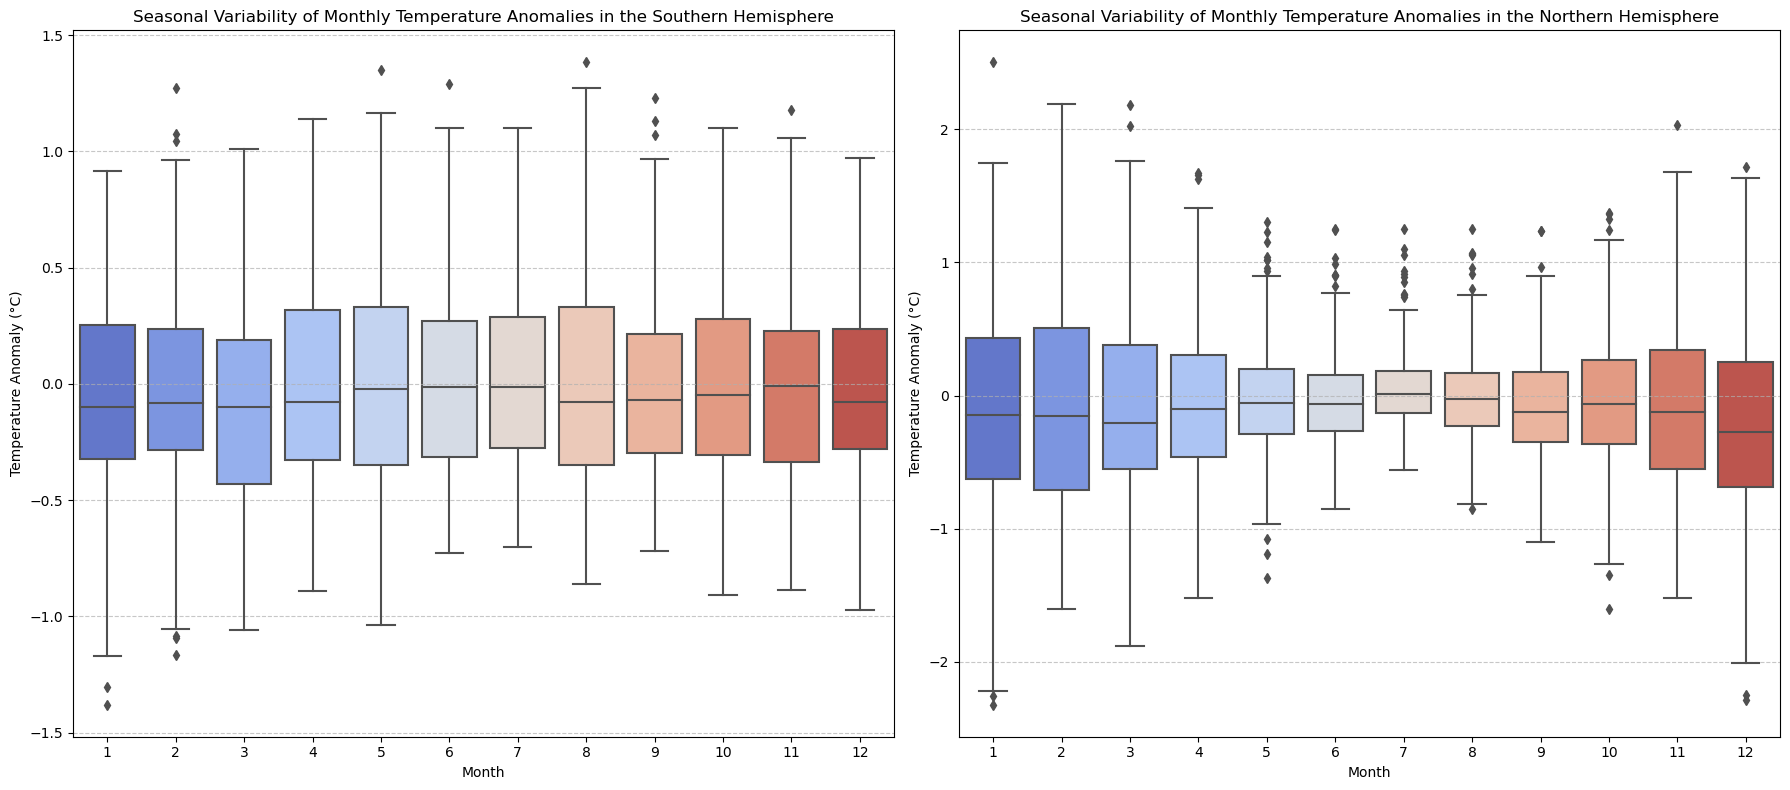

In [20]:
#Box Plots for southern Hemisphere "Monthly Anomaly" by month again
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='Month', y='Monthly Anomaly', data = df_south, palette="coolwarm")
plt.title("Seasonal Variability of Monthly Temperature Anomalies in the Southern Hemisphere")
plt.xlabel("Month")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Box Plots for southern Hemisphere "Monthly Anomaly" by month again
plt.subplot(1, 2, 2)
sns.boxplot(x='Month', y='Monthly Anomaly', data = df_north, palette="coolwarm")
plt.title("Seasonal Variability of Monthly Temperature Anomalies in the Northern Hemisphere")
plt.xlabel("Month")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The box plots demonstrate the seasonal variability of monthly temperature anomalies for both the Southern and Northern Hemispheres. In the Southern Hemisphere, the range of anomalies is relatively smaller and less varied, suggesting a more consistent climate throughout the year. However, there is a notable spread during certain months, indicating some seasonal variation. Conversely, the Northern Hemisphere exhibits a broader range of temperature anomalies, with higher extremes, particularly during the middle of the year, indicating greater variability and more pronounced seasonal effects. The outliers present in both plots indicate months with exceptionally high or low temperature anomalies, but these are more frequent in the Northern Hemisphere, reflecting its more variable climate. Overall, the seasonal patterns are inverse due to the different timing of seasons in the two hemispheres.

Understanding monthly fluctuations helps identify influential months driving average trends and reveals the cyclical nature of the climate, addressing questions related to seasonal variations.

These insights further our understanding of climate data by capturing not only long-term trends but also monthly and seasonal dynamics in both hemispheres.

### 4. Heatmaps (Year by Month Anomalies): 

Following the box plots, heatmaps continue the story of variability by showing how these anomalies play out over each month and year, giving a more detailed perspective of the temporal patterns, with colors indicating warmer or cooler than average temperatures. This can quickly show patterns and trends over time.

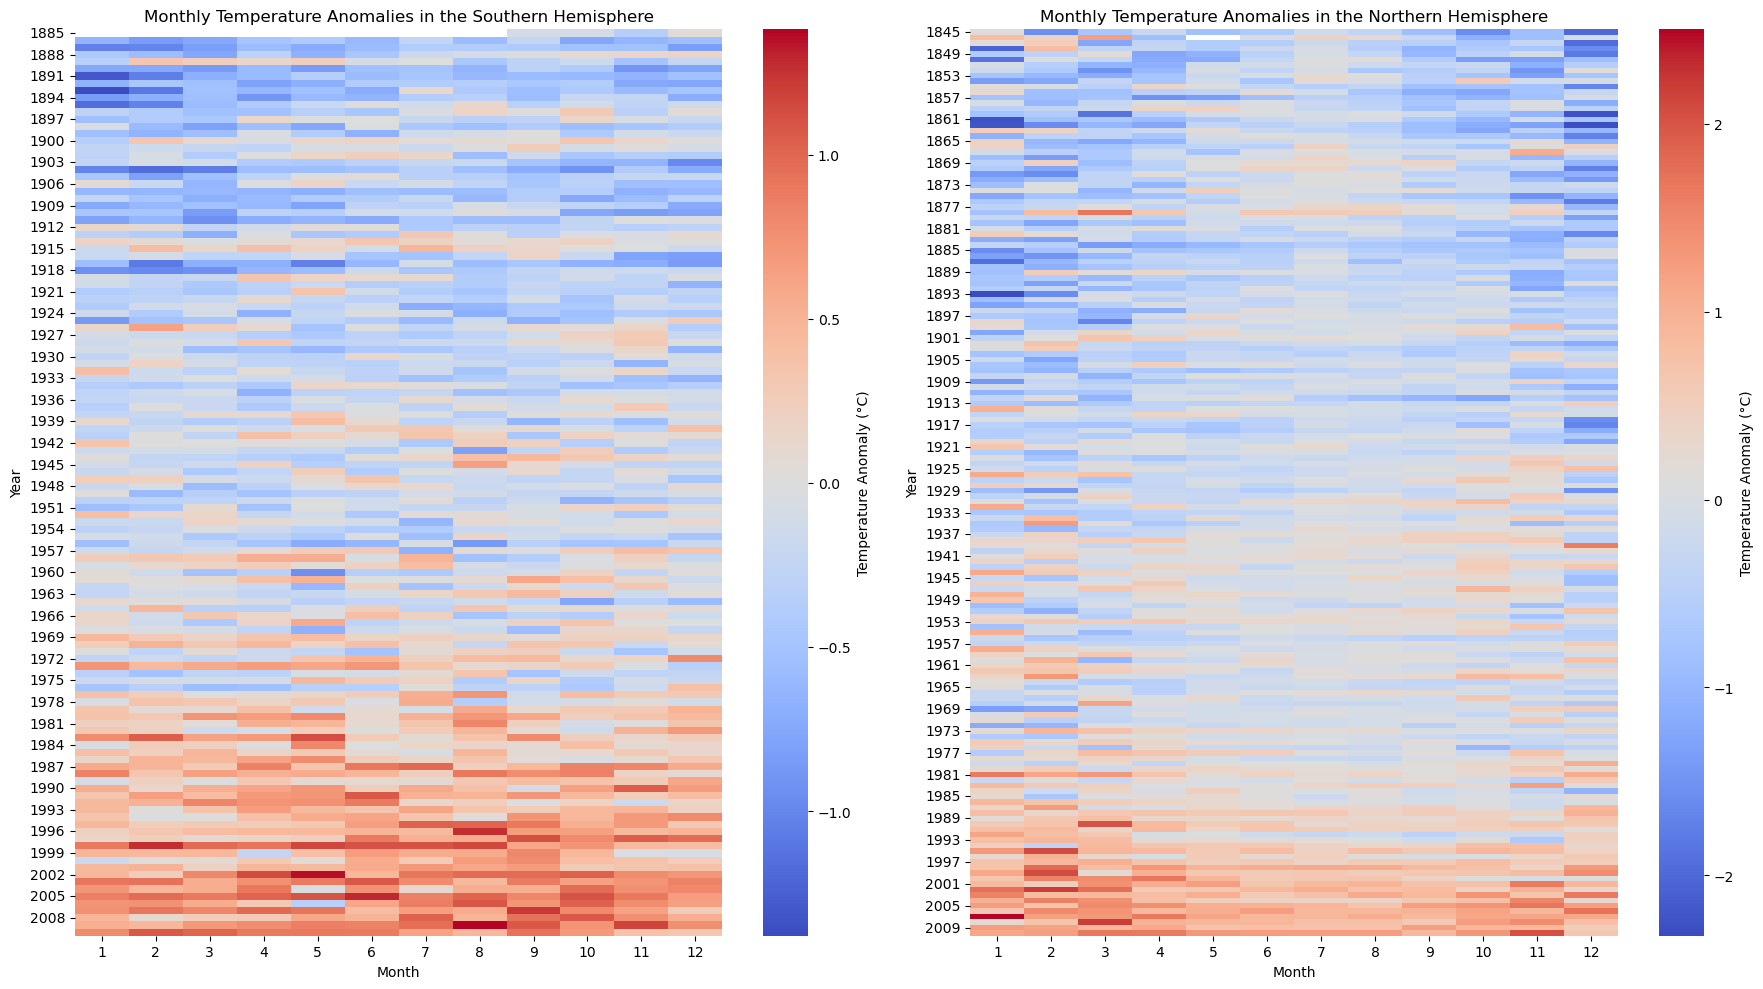

In [21]:
# Preparing the data for the Southern Hemisphere
heatmap_data_south = df_south.pivot(index="Year", columns="Month", values="Monthly Anomaly")

# Preparing the data for the Northern Hemisphere
heatmap_data_north = df_north.pivot(index="Year", columns="Month", values="Monthly Anomaly")

# Plotting both heatmaps side by side
plt.figure(figsize=(18, 10))

# Plot 1: Southern Hemisphere
plt.subplot(1, 2, 1)
plt.title('Monthly Temperature Anomalies in the Southern Hemisphere')
sns.heatmap(heatmap_data_south, cmap='coolwarm', cbar_kws={'label': 'Temperature Anomaly (°C)'})
plt.xlabel('Month')
plt.ylabel('Year')

# Plot 2: Northern Hemisphere
plt.subplot(1, 2, 2)
plt.title('Monthly Temperature Anomalies in the Northern Hemisphere')
sns.heatmap(heatmap_data_north, cmap='coolwarm', cbar_kws={'label': 'Temperature Anomaly (°C)'})
plt.xlabel('Month')
plt.ylabel('Year')

plt.tight_layout()
plt.show()


The heatmaps above visually represent the monthly temperature anomalies for each year in both the Northern and Southern Hemispheres, with color intensities indicating the magnitude of temperature deviations from the average.

**Observations:**
**Northern Hemisphere:**

The heatmap shows a clear trend of increasing temperature anomalies over time, especially noticeable in recent years. This is indicative of warming trends where more recent years display warmer colors, representing higher temperature anomalies.
There are periods with notable temperature deviations, reflecting extreme weather events or shifts in climate patterns.

**Southern Hemisphere:**
Similar to the Northern Hemisphere, the Southern Hemisphere heatmap also exhibits a trend towards higher temperature anomalies in more recent years. However, the pattern may appear slightly different due to differing climatic influences and distributions between the two hemispheres.
Seasonal variations are visible, with certain months consistently showing warmer or cooler anomalies over the years.

The heatmaps for the Southern and Northern Hemispheres display the monthly temperature anomalies across different years, with colors representing the magnitude of anomalies. They show how temperature deviations from the historical average vary by month and over years, allowing us to observe patterns such as consistently warmer or cooler months, any shifts towards increasing or decreasing anomalies, and the emergence of warming or cooling trends over time. Patterns of red indicate warmer than average temperatures, and shades of blue indicate cooler than average temperatures. The gradation and concentration of colors provide a visual summary of climate trends, revealing not just seasonal fluctuations but also the progression of temperature changes through the decades.

### 5. Decadal Trends (Five-year, Ten-year, Twenty-year Moving Averages): 
With an understanding of the monthly and yearly variability, we can look at decadal trends to smooth out short-term fluctuations and show how the climate has shifted over longer periods.

Decadal Trends (Five-year, Ten-year, Twenty-year Averages): These plots can provide a clearer view of the climate's direction by averaging out the anomalies over longer periods.

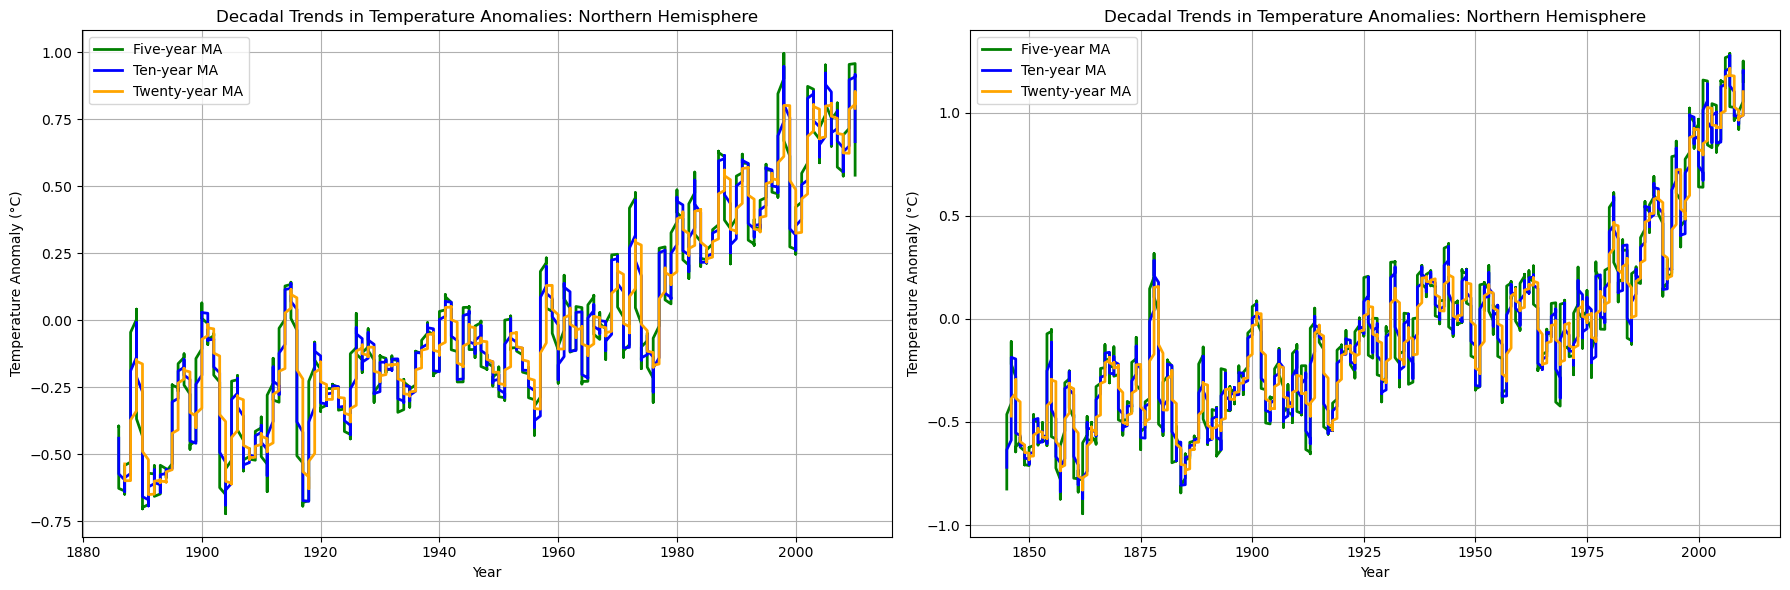

In [22]:
# Calculating moving averages for the Southern Hemisphere "Annual Anomaly" to visualize long-term trends
df_south['Five-year MA'] = df_south['Annual Anomaly'].rolling(window=5).mean()
df_south['Ten-year MA'] = df_south['Annual Anomaly'].rolling(window=10).mean()
df_south['Twenty-year MA'] = df_south['Annual Anomaly'].rolling(window=20).mean()
plt.figure(figsize=(18, 6))

# Calculating moving averages for the Northern Hemisphere "Annual Anomaly" to visualize long-term trends
df_north['Five-year MA'] = df_north['Annual Anomaly'].rolling(window=5).mean()
df_north['Ten-year MA'] = df_north['Annual Anomaly'].rolling(window=10).mean()
df_north['Twenty-year MA'] = df_north['Annual Anomaly'].rolling(window=20).mean()


# # Plotting Annual Anomaly with Moving Averages for Southern Hemisphere
plt.subplot(1, 2, 1)
#plt.plot(df_south["Year"], df_south["Annual Anomaly"], label="Annual Anomaly", color='red', alpha=0.5)
plt.plot(df_south["Year"], df_south["Five-year MA"], label="Five-year MA", color='green', linewidth=2)
plt.plot(df_south["Year"], df_south["Ten-year MA"], label="Ten-year MA", color='blue', linewidth=2)
plt.plot(df_south["Year"], df_south["Twenty-year MA"], label="Twenty-year MA", color='orange', linewidth=2)
plt.title("Decadal Trends in Temperature Anomalies: Northern Hemisphere")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.grid(True)


# # Plotting Annual Anomaly with Moving Averages for Northern Hemisphere
plt.subplot(1, 2, 2)
#plt.plot(df_north["Year"], df_north["Annual Anomaly"], label="Annual Anomaly", color='red', alpha=0.5)
plt.plot(df_north["Year"], df_north["Five-year MA"], label="Five-year MA", color='green', linewidth=2)
plt.plot(df_north["Year"], df_north["Ten-year MA"], label="Ten-year MA", color='blue', linewidth=2)
plt.plot(df_north["Year"], df_north["Twenty-year MA"], label="Twenty-year MA", color='orange', linewidth=2)
plt.title("Decadal Trends in Temperature Anomalies: Northern Hemisphere") #moving averages
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

The image depicts line graphs showing decadal trends in temperature anomalies for the Southern and Northern Hemisphere, with lines representing different moving averages (five-year, ten-year, twenty-year). 

All three moving averages indicate an increasing trend in temperature anomalies over time, confirming the insights from earlier analyses that both hemispheres are experiencing a warming trend, particularly pronounced in recent decades.

Northern Hemisphere exhibits a steeper increase in temperature anomalies, particularly in the recent decades, which could indicate more pronounced effects of climate change in that part of the world. 

**Relation to Previous Insights:**
The graph complements previous insights from histograms and box plots by adding a long-term perspective. While the histograms and box plots highlighted variability and seasonal patterns, this time series analysis with moving averages provides a clearer view of how these anomalies accumulate into significant warming trends over time. It confirms that the short-term and seasonal variations observed fit within a broader context of steady climate change.

### 6. Decadal Trend Summary (Table): 
A table summarizing the average anomalies by decade provides a clear and concise numerical overview of these longer-term trends, reinforcing the insights gained from the decadal trend graphs.

In [23]:
# Function to calculate the average temperature anomaly for each decade
def calculate_decadal_averages(df, column_name):
    # Adding a 'Decade' column to the dataframe
    df['Decade'] = (df['Year'] // 10) * 10
    # Grouping by 'Decade' and calculating the mean of the specified column
    decadal_averages = df.groupby('Decade')[column_name].mean().reset_index()
    return decadal_averages

# Calculating decadal averages for the "Annual Anomaly" in both hemispheres
decadal_averages_south = calculate_decadal_averages(df_south, "Annual Anomaly")
decadal_averages_north = calculate_decadal_averages(df_north, "Annual Anomaly")


# Displaying the decadal trend summary for both hemispheres
decadal_trends_summary = pd.merge(decadal_averages_south,decadal_averages_north, on='Decade', suffixes=(' Southern',' Northern' ))
decadal_trends_summary


,Decade,Annual Anomaly Southern,Annual Anomaly Northern
0,1880,-0.388673,-0.516817
1,1890,-0.445167,-0.385408
2,1900,-0.342017,-0.276225
3,1910,-0.261675,-0.315042
4,1920,-0.234625,-0.116533
5,1930,-0.173308,0.000442
6,1940,-0.084717,0.091133
7,1950,-0.113558,-0.028908
8,1960,-0.023275,-0.022792
9,1970,0.067708,-0.003067


**Long-term Warming Trend**

**Gradual Increase:** Both hemispheres exhibit a gradual increase in temperature anomalies over the decades, confirming a long-term warming trend. The early decades show negative anomalies, implying cooler temperatures compared to the baseline, while later decades, especially post-1980, show increasingly positive anomalies, indicating warmer temperatures.

**Acceleration of Warming:** The rate of warming appears to accelerate, especially in recent decades. The jump from the 2000s to the 2010s and then to the 2020s shows significant increases in temperature anomalies, indicating that warming is not only continuing but accelerating.


**Northern Hemisphere Warmer:** The Northern Hemisphere consistently shows higher temperature anomalies compared to the Southern Hemisphere across all decades. This might be due to a variety of factors, including differences in land mass, ocean currents, and human activities.

**Relative Differences:** While both hemispheres are warming, the relative increase in anomalies is more pronounced in the Northern Hemisphere in the most recent decades, suggesting that it might be experiencing more rapid changes in temperature.

**Question Answered:**
The table answers the question, "How do long-term temperature trends manifest, and are there any significant periods of warming or cooling?": The table shows long-term trends over decades starting around the 1980s, indicating a general increase in temperature anomalies over time in both hemispheres. The rising values reflect a trend of warming, with the Northern Hemisphere showing a slightly higher increase in recent decades compared to the Southern Hemisphere, suggesting potential differences in the rate or intensity of long-term climate change patterns between the two hemispheres.

**Relation to Previous Analysis:**: This decadal trend table affirms the warming trend observed in the previous decadal trend graph and other analyses by quantifying the change in temperature anomalies. It provides numerical evidence of the transition from a cooler climate in the late 19th and early 20th centuries to a warmer climate in recent decades. The numerical data complements the visual trends, demonstrating consistent and robust warming in both hemispheres, with the Northern Hemisphere showing a slightly 

### 7. Comparative Plots (Northern vs. Southern Hemisphere Trends): 
These plots provide a direct comparison of the hemispheres, leveraging the foundation of understanding built by the previous visualizations to highlight similarities and differences in long-term trends.

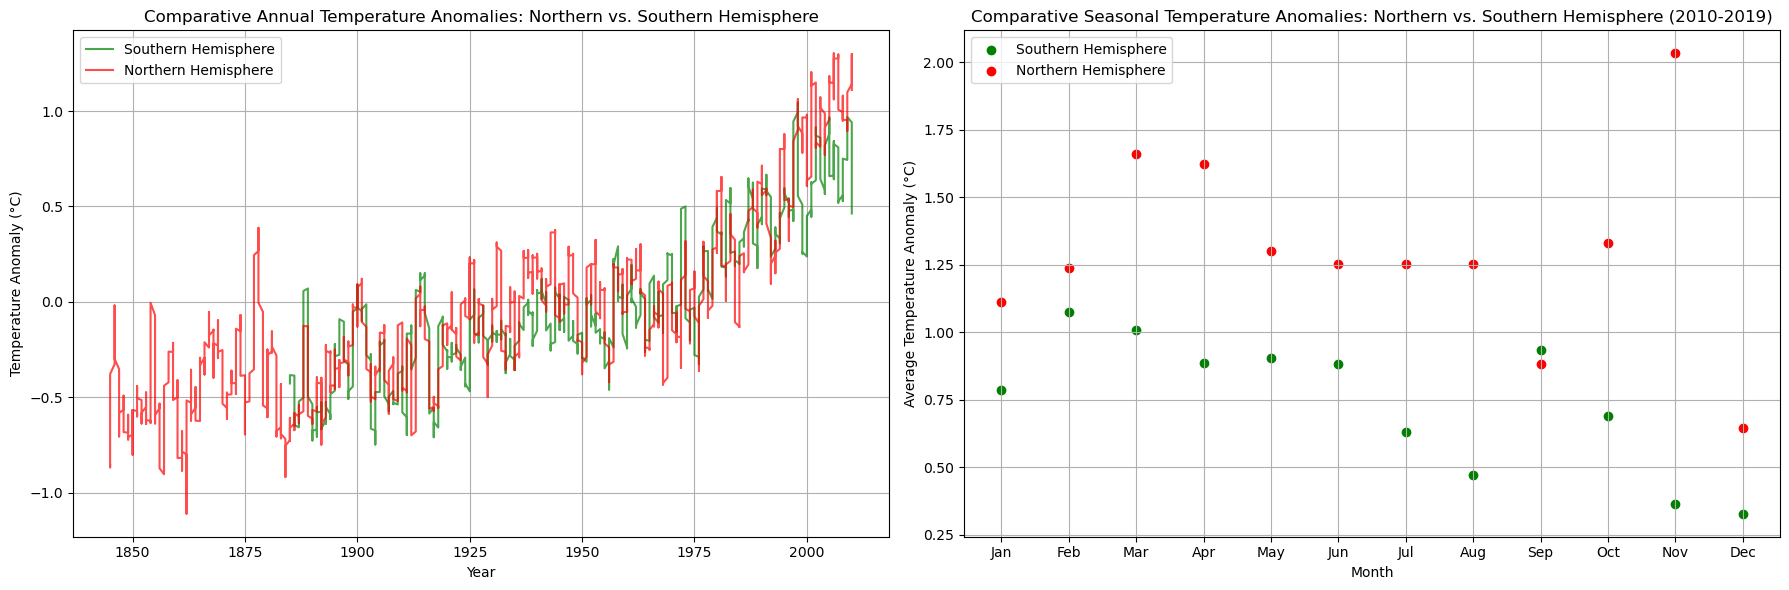

In [24]:
plt.figure(figsize=(18, 6))

# Plot 1: Overlaying Annual Temperature Anomalies
plt.subplot(1, 2, 1)
plt.plot(df_south['Year'], df_south['Annual Anomaly'], label='Southern Hemisphere', color='green', alpha=0.7)
plt.plot(df_north['Year'], df_north['Annual Anomaly'], label='Northern Hemisphere', color='red', alpha=0.7)
plt.title('Comparative Annual Temperature Anomalies: Northern vs. Southern Hemisphere')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True)


#Plot 2
# Overlaying Monthly Temperature Anomalies for a selected year range to better visualize seasonal patterns

# Selecting a recent decade for closer inspection
recent_decade_north = df_north[(df_north['Year'] >= 2010) & (df_north['Year'] < 2020)]
recent_decade_south = df_south[(df_south['Year'] >= 2010) & (df_south['Year'] < 2020)]

plt.subplot(1, 2, 2)
for month in range(1, 13):
    monthly_avg_south = recent_decade_south[recent_decade_south['Month'] == month]['Monthly Anomaly'].mean()
    monthly_avg_north = recent_decade_north[recent_decade_north['Month'] == month]['Monthly Anomaly'].mean()
    
    plt.scatter(month, monthly_avg_south, color='green', label='Southern Hemisphere' if month == 1 else "")
    plt.scatter(month, monthly_avg_north, color='red', label='Northern Hemisphere' if month == 1 else "")

plt.title('Comparative Seasonal Temperature Anomalies: Northern vs. Southern Hemisphere (2010-2019)')
plt.xlabel('Month')
plt.ylabel('Average Temperature Anomaly (°C)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

The comparative plots depict temperature anomaly trends between the Northern and Southern Hemispheres, with the left graph showing annual temperature anomalies over a long timespan and the right graph displaying seasonal temperature anomalies for a recent decade.

The seasonal anomalies plot focuses on average monthly temperature anomalies for a recent decade, comparing seasonal patterns between the two hemispheres. This comparison highlights the seasonal variability in temperature anomalies, with some months showing closer alignment between hemispheres than others. It indicates the Northern Hemisphere experiences higher temperature extremes during certain months compared to the Southern Hemisphere.

Together, these graphs suggest that while both hemispheres are warming, the Northern Hemisphere is warming faster and with more variability, both annually and seasonally.

These comparative plots would affirm the warming trends identified in previous visualizations such as decadal trend graphs and heatmaps, further detailing the differences between the hemispheres. They also add a seasonal perspective, potentially offering insight into specific months where temperature deviations are most significant.

### 8. Scatter Plots (Anomalies vs Uncertainties): 
Scatter plots can then be used to discuss the reliability of our data, showing the relationship between the size of the anomalies and the associated uncertainties, adding depth to our understanding of the trends shown previously.
- Focusing on the question: How reliable are the temperature anomaly estimates considering the associated uncertainties?

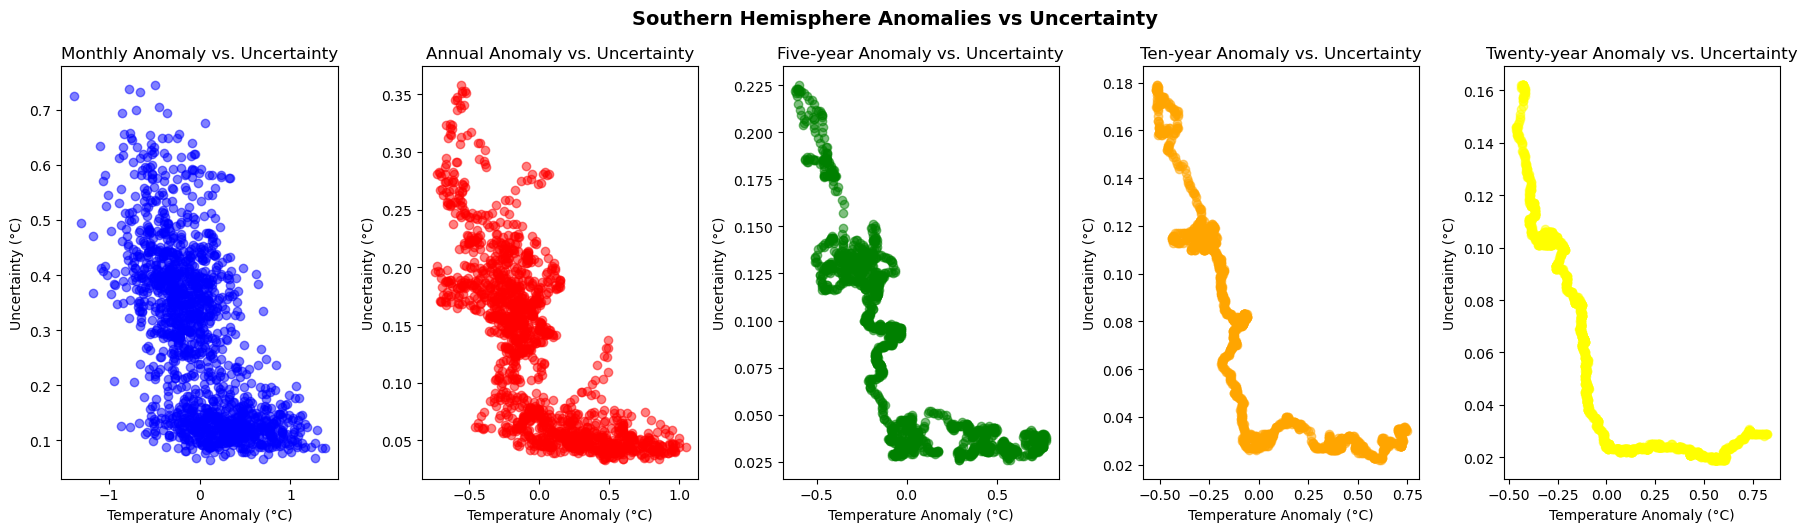

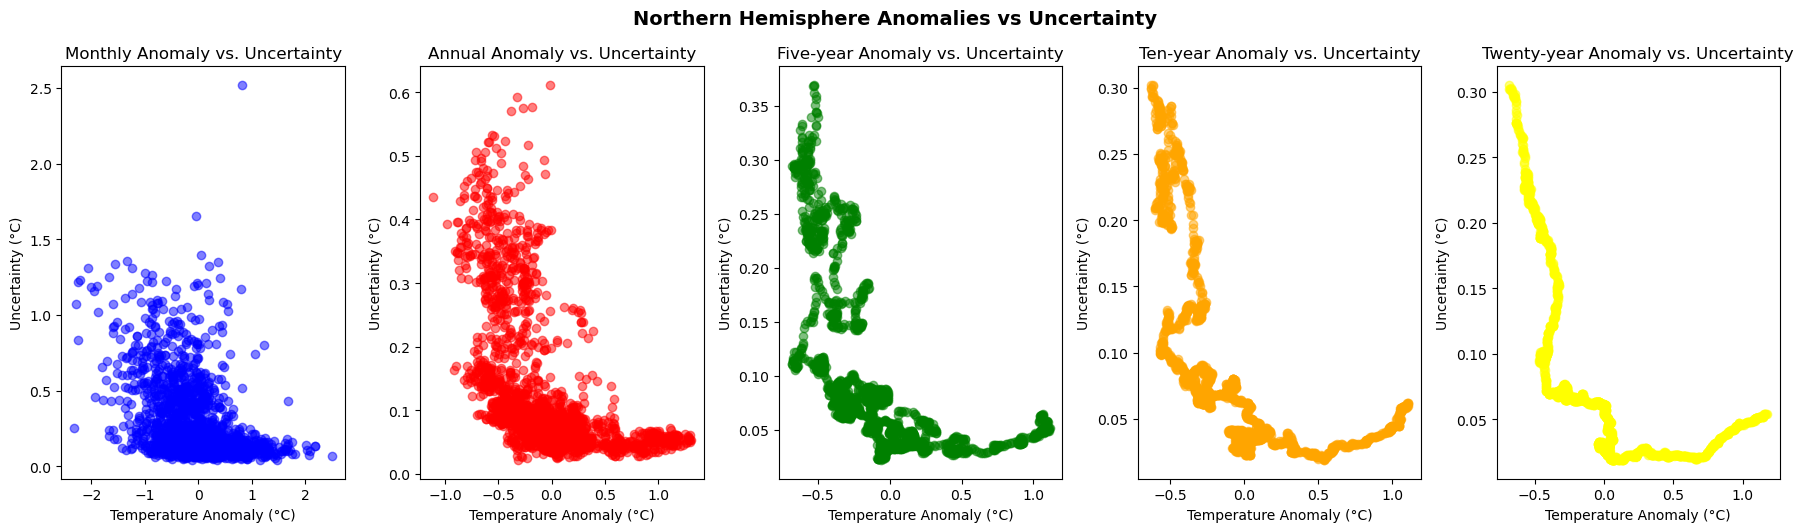

In [25]:
#Southern Hemisphere Anomalies vs Uncertainty
plt.figure(figsize=(18, 6))

# Monthly Anomaly vs. Uncertainty
plt.subplot(1, 5, 1)
plt.scatter(df_south["Monthly Anomaly"], df_south["Monthly Unc."], color='blue', alpha=0.5)
plt.title('Monthly Anomaly vs. Uncertainty')
plt.xlabel('Temperature Anomaly (°C)')
plt.ylabel('Uncertainty (°C)')

# Annual Anomaly vs. Uncertainty
plt.subplot(1, 5, 2)
plt.scatter(df_south["Annual Anomaly"], df_south["Annual Unc."], color='red', alpha=0.5)
plt.title('Annual Anomaly vs. Uncertainty')
plt.xlabel('Temperature Anomaly (°C)')
plt.ylabel('Uncertainty (°C)')

# Five-year Anomaly vs. Uncertainty
plt.subplot(1, 5, 3)
plt.scatter(df_south["Five-year Anomaly"], df_south["Five-year Unc."], color='green', alpha=0.5)
plt.title('Five-year Anomaly vs. Uncertainty')
plt.xlabel('Temperature Anomaly (°C)')
plt.ylabel('Uncertainty (°C)')

# Ten-year Anomaly vs. Uncertainty
plt.subplot(1, 5, 4)
plt.scatter(df_south["Ten-year Anomaly"], df_south["Ten-year Unc."], color='orange', alpha=0.5)
plt.title('Ten-year Anomaly vs. Uncertainty')
plt.xlabel('Temperature Anomaly (°C)')
plt.ylabel('Uncertainty (°C)')

#"Twenty-year Anomaly", "Twenty-year Unc."
plt.subplot(1, 5, 5)
plt.scatter(df_south["Twenty-year Anomaly"], df_south["Twenty-year Unc."], color='yellow', alpha=0.5)
plt.title('Twenty-year Anomaly vs. Uncertainty')
plt.xlabel('Temperature Anomaly (°C)')
plt.ylabel('Uncertainty (°C)')

# Add overarching heading and table
plt.suptitle("Southern Hemisphere Anomalies vs Uncertainty", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

#Northern Hemisphere Anomalies vs Uncertainty
plt.figure(figsize=(18, 6))
# Monthly Anomaly vs. Uncertainty
plt.subplot(1, 5, 1)
plt.scatter(df_north["Monthly Anomaly"], df_north["Monthly Unc."], color='blue', alpha=0.5)
plt.title('Monthly Anomaly vs. Uncertainty')
plt.xlabel('Temperature Anomaly (°C)')
plt.ylabel('Uncertainty (°C)')

# Annual Anomaly vs. Uncertainty
plt.subplot(1, 5, 2)
plt.scatter(df_north["Annual Anomaly"], df_north["Annual Unc."], color='red', alpha=0.5)
plt.title('Annual Anomaly vs. Uncertainty')
plt.xlabel('Temperature Anomaly (°C)')
plt.ylabel('Uncertainty (°C)')

# Five-year Anomaly vs. Uncertainty
plt.subplot(1, 5, 3)
plt.scatter(df_north["Five-year Anomaly"], df_north["Five-year Unc."], color='green', alpha=0.5)
plt.title('Five-year Anomaly vs. Uncertainty')
plt.xlabel('Temperature Anomaly (°C)')
plt.ylabel('Uncertainty (°C)')

# Ten-year Anomaly vs. Uncertainty
plt.subplot(1, 5, 4)
plt.scatter(df_north["Ten-year Anomaly"], df_north["Ten-year Unc."], color='orange', alpha=0.5)
plt.title('Ten-year Anomaly vs. Uncertainty')
plt.xlabel('Temperature Anomaly (°C)')
plt.ylabel('Uncertainty (°C)')

#"Twenty-year Anomaly", "Twenty-year Unc."
plt.subplot(1, 5, 5)
plt.scatter(df_north["Twenty-year Anomaly"], df_north["Twenty-year Unc."], color='yellow', alpha=0.5)
plt.title('Twenty-year Anomaly vs. Uncertainty')
plt.xlabel('Temperature Anomaly (°C)')
plt.ylabel('Uncertainty (°C)')

# Add overarching heading
plt.suptitle("Northern Hemisphere Anomalies vs Uncertainty", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

The scatter plots above show the relationship between temperature anomalies and their associated uncertainties for different time scales (monthly, annual, five-year, and ten-year) in the Southern Hemisphere.

The monthly anomalies show a wide spread of uncertainty, which decreases as the anomalies increase. This pattern suggests that higher temperature anomalies might be measured with greater certainty on a monthly basis.
For annual anomalies, the spread of uncertainty is less, clustering more towards the middle range of anomalies. This indicates that year-to-year anomalies may be reported with moderate reliability.
The five-year, ten-year and twenty year anomalies show even less uncertainty, which diminishes as the anomalies become more positive. This pattern implies that multi-year averages provide more reliable temperature anomaly estimates, as they smooth out the variability seen in shorter-term data.

**Question answered:** How reliable are the temperature anomaly estimates considering the associated uncertainties?
The scatter plots answer the question of reliability by visually representing the inverse relationship between the magnitude of temperature anomalies and their associated uncertainties, especially over longer time scales. They suggest that while short-term estimates (monthly, annual) have more uncertainty, this uncertainty tends to decrease with the use of longer-term averages (five-year, ten-year, twenty-year), supporting the reliability of observed long-term warming trends as indicators of climate change.

*Reliability of Data Discussion:*
These plots illustrate that larger anomalies, particularly over longer periods, come with lower uncertainty. This trend in the data suggests that while single-year estimates may have more noise, long-term trends of warming are statistically robust, reinforcing the confidence in the conclusions drawn from previous temperature trend analyses.

### 9. Correlation Matrices (Anomaly Period Correlations): 

Finally, correlation matrices will be used to tie everything together, showing the statistical relationships between short-term and long-term variations, and providing a quantitative backdrop to the qualitative insights from earlier visualizations.

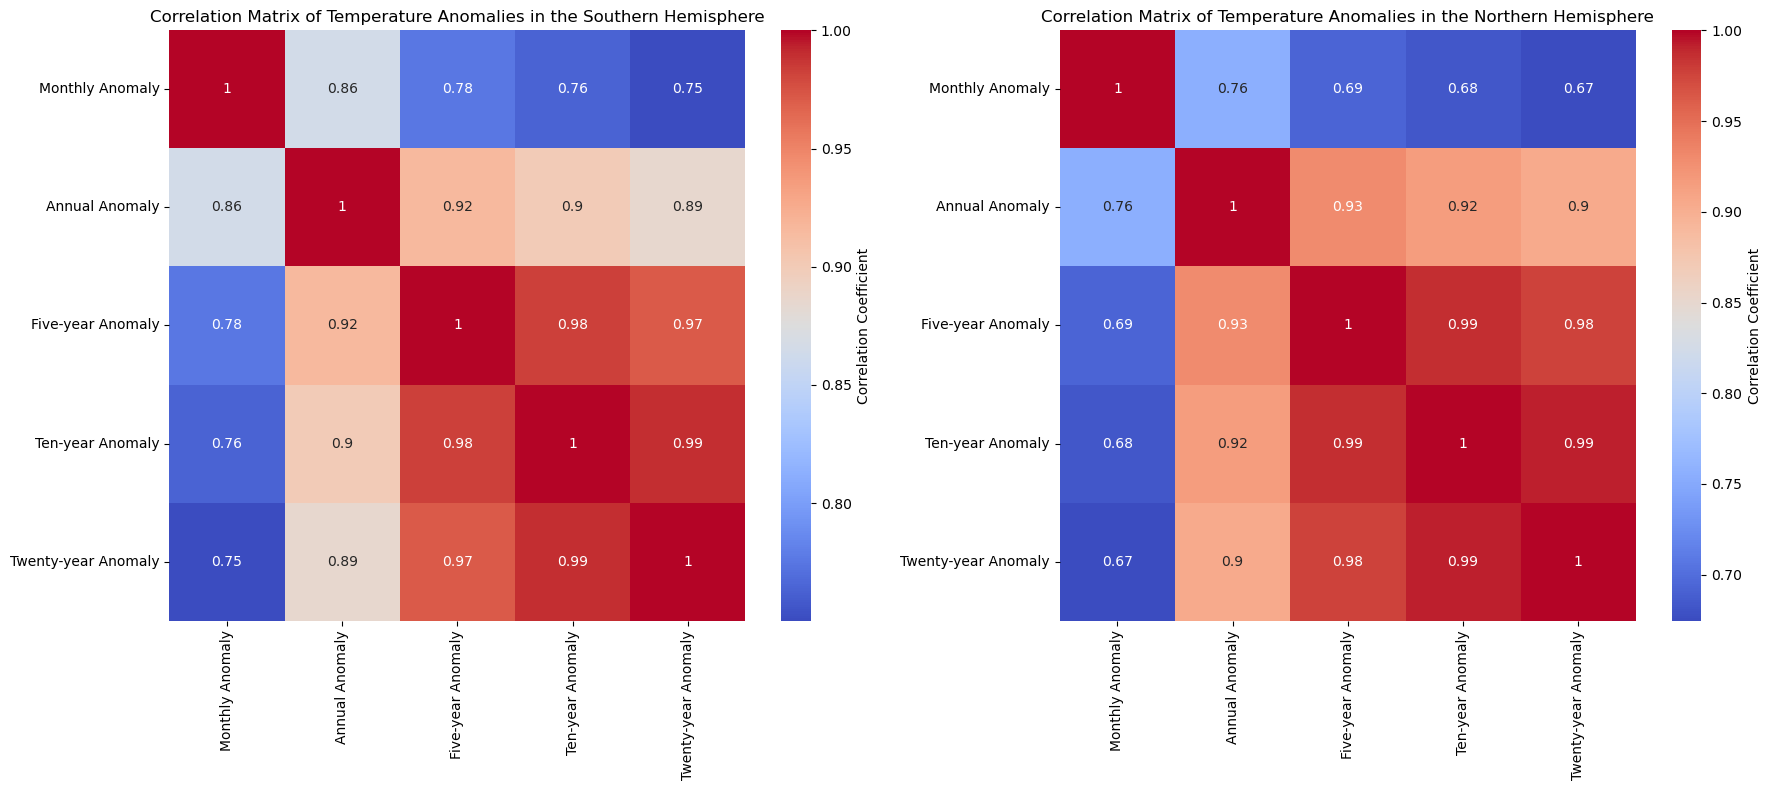

In [29]:
# For the correlation matrices, we'll use only the anomaly columns from both datasets
anomaly_columns = ["Monthly Anomaly", "Annual Anomaly", "Five-year Anomaly", "Ten-year Anomaly", "Twenty-year Anomaly"]

# Calculating correlation matrices
correlation_matrix_south = df_south[anomaly_columns].corr()

correlation_matrix_north = df_north[anomaly_columns].corr()

#plotting matrix side by side
plt.figure(figsize=(18, 8))

# Plotting the correlation matrix for the Southern Hemisphere
plt.subplot(1, 2, 1)
plt.title('Correlation Matrix of Temperature Anomalies in the Southern Hemisphere')
sns.heatmap(correlation_matrix_south, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})

# Plotting the correlation matrix for the Northern Hemisphere
plt.subplot(1, 2, 2)
plt.title('Correlation Matrix of Temperature Anomalies in the Northern Hemisphere')
sns.heatmap(correlation_matrix_north, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})

plt.tight_layout()
plt.show()


The correlation matrices for the Southern and Northern Hemispheres offer a numerical perspective on the relationships between various temporal scales of temperature anomalies. They reveal strong positive correlations between monthly, annual, five-year, ten-year, and twenty-year anomalies, suggesting that despite seasonal and monthly fluctuations, there is an underlying consistency in temperature trends over time.

1. Seasonal variations and patterns are evident in the short-term correlations, especially between monthly and annual anomalies, indicating that while anomalies fluctuate seasonally, they are consistent within a given year.
2. Long-term trends manifest as high correlations in the five-year, ten-year, and twenty-year averages, confirming persistent warming or cooling trends that transcend yearly variability.
3. The reliability of temperature anomaly estimates increases with the length of the period over which they are averaged, as indicated by the diminishing uncertainties in longer-term trends.
4. Short-term, medium-term, and long-term temperature trends demonstrate increasing alignment when analyzed through different moving averages, highlighting that longer averages are better at smoothing out short-term volatility and revealing more stable long-term trends.
5. The comparison between hemispheres shows a slight difference in the strength of the correlations, potentially suggesting different climate dynamics at play, with the Northern Hemisphere displaying slightly stronger correlations between the different time scales of anomalies.

In summary, these correlation matrices provide a quantitative validation of qualitative insights gained from earlier visualizations, confirming consistent warming trends over the long term, with reduced uncertainties as we look at longer averaging periods, thus reinforcing the reliability of long-term climate change indications.